# Exploraci√≥n de datos

In [1]:
# Manipulaci√≥n de datos
import pandas as pd
import numpy as np

# Visualizaci√≥n
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Estad√≠stica descriptiva y pruebas de normalidad
from scipy.stats import skew, kurtosis, jarque_bera, shapiro
from scipy import stats

# Modelado y diagn√≥stico estad√≠stico
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

* Cargar datos
```{note}
Se analizan los datos despu√©s del preprocesamiento.

In [2]:
# Lectura de archivo y selecci√≥n de variables de inter√©s
btc = pd.read_csv(r"C:\Users\Hp\MACHINE\MINI_PRY_2\data\BTC_all.csv")
btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce', format='%Y-%m-%d')
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2566 non-null   datetime64[ns]
 1   Close        2566 non-null   float64       
 2   log_return   2566 non-null   float64       
 3   Volatil_D7   2566 non-null   float64       
 4   Volatil_D14  2566 non-null   float64       
 5   Volatil_D21  2566 non-null   float64       
 6   Volatil_D28  2566 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 140.5 KB


## 1. Precio de cierre

In [3]:
btc['Close'].describe()

count      2566.000000
mean      29264.276684
std       23644.382719
min        3211.720000
25%        8979.587500
50%       23067.550000
75%       43782.805000
max      106143.820000
Name: Close, dtype: float64

In [4]:
mean = btc['Close'].mean()
std = btc['Close'].std()

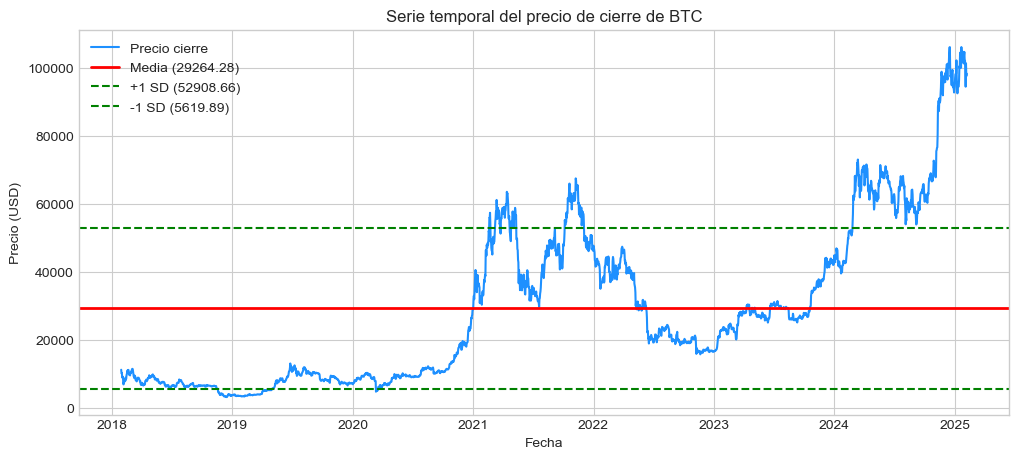

In [5]:
plt.figure(figsize=(12,5))
plt.plot(btc['Date'], btc['Close'], label="Precio cierre", color = 'dodgerblue')
# L√≠nea de la media
plt.axhline(mean, color='red', linestyle='-', linewidth=2, label=f"Media ({mean:.2f})")

# L√≠neas punteadas ¬±1 desviaci√≥n est√°ndar
plt.axhline(mean + std, color='green', linestyle='--', linewidth=1.5, label=f"+1 SD ({mean+std:.2f})")
plt.axhline(mean - std, color='green', linestyle='--', linewidth=1.5, label=f"-1 SD ({mean-std:.2f})")

plt.title("Serie temporal del precio de cierre de BTC")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

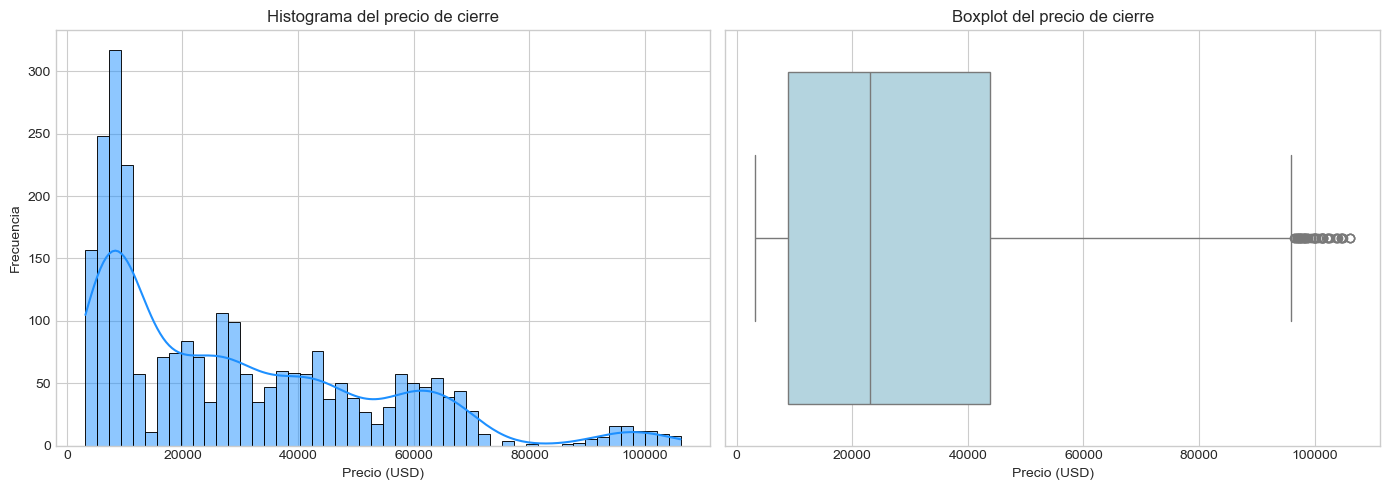

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
sns.histplot(btc['Close'], bins=50, kde=True, ax=axes[0], color='dodgerblue')
axes[0].set_title('Histograma del precio de cierre')
axes[0].set_xlabel('Precio (USD)')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=btc['Close'], ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot del precio de cierre')
axes[1].set_xlabel('Precio (USD)')

plt.tight_layout()
plt.show()


De los 2,594 registros, el precio de cierre de BTC var√≠a entre USD $3,211$ y USD $106,143$. El promedio en el periodo fue de USD $29,090$ ($\pm 23,576$), mientras que la mediana alcanz√≥ USD $22,741$. La diferencia entre la mediana y la mediana, junto con la alta desviaci√≥n est√°ndar, evidencia una volatilidad extreman y sugiere que la distribuci√≥n de precios no sigue una normalidad. 

En la serie temporal del precio de cierre, se observa que entre 2018 a 202 predominaban los valores m√°s bajos. A partir del 2021 se registra un incremento abrupto, con precios que superan la media m√°s de una desviaci√≥n est√°ndar. Posteriormente, entre finales de 2021 y 2022, el BTC experimenta una marcada alta variabilidad, seguida de una ca√≠da en 2023. Desde entonces, se aprecia una recuperaci√≥n que continua. El a√±o 2024 tambi√©n muestra alta variabilidad. Al final se registra un pico de aumento hacia finales del 2025, con los valores m√°s altos del registro. 

La distribuci√≥n del precio presenta una clara asimetr√≠a positiva, impulsada por los valores m√°ximos alcanzados en los √∫ltimos a√±os.

* interpretacion

## 2. Retornos logar√≠tmicos

In [7]:
# Limpiar datos (eliminar NaN e infinitos)
returns = btc['log_return'].replace([np.inf, -np.inf], np.nan).dropna()
returns.describe()

count    2566.000000
mean        0.000824
std         0.035672
min        -0.502607
25%        -0.014141
50%         0.000658
75%         0.016119
max         0.178449
Name: log_return, dtype: float64

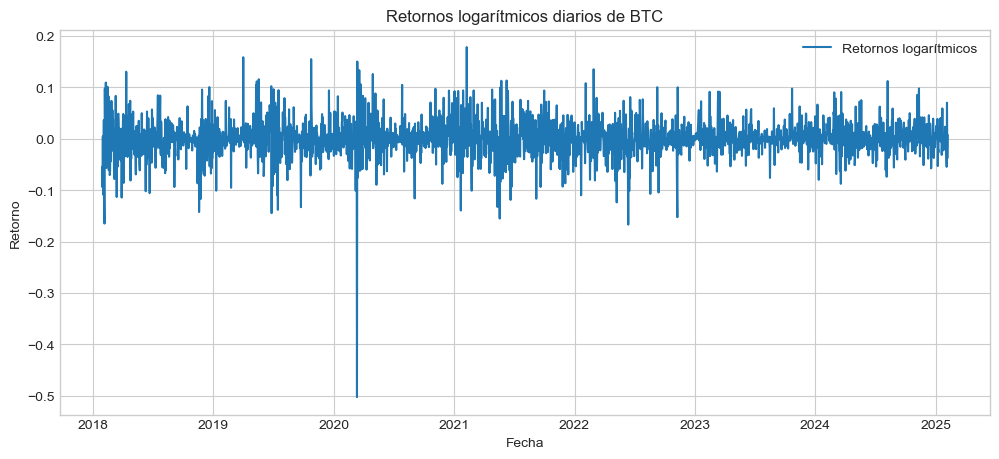

In [8]:
plt.figure(figsize=(12,5))
plt.plot(btc['Date'], btc['log_return'], label="Retornos logar√≠tmicos")
plt.title("Retornos logar√≠tmicos diarios de BTC")
plt.xlabel("Fecha")
plt.ylabel("Retorno")
plt.legend()
plt.show()

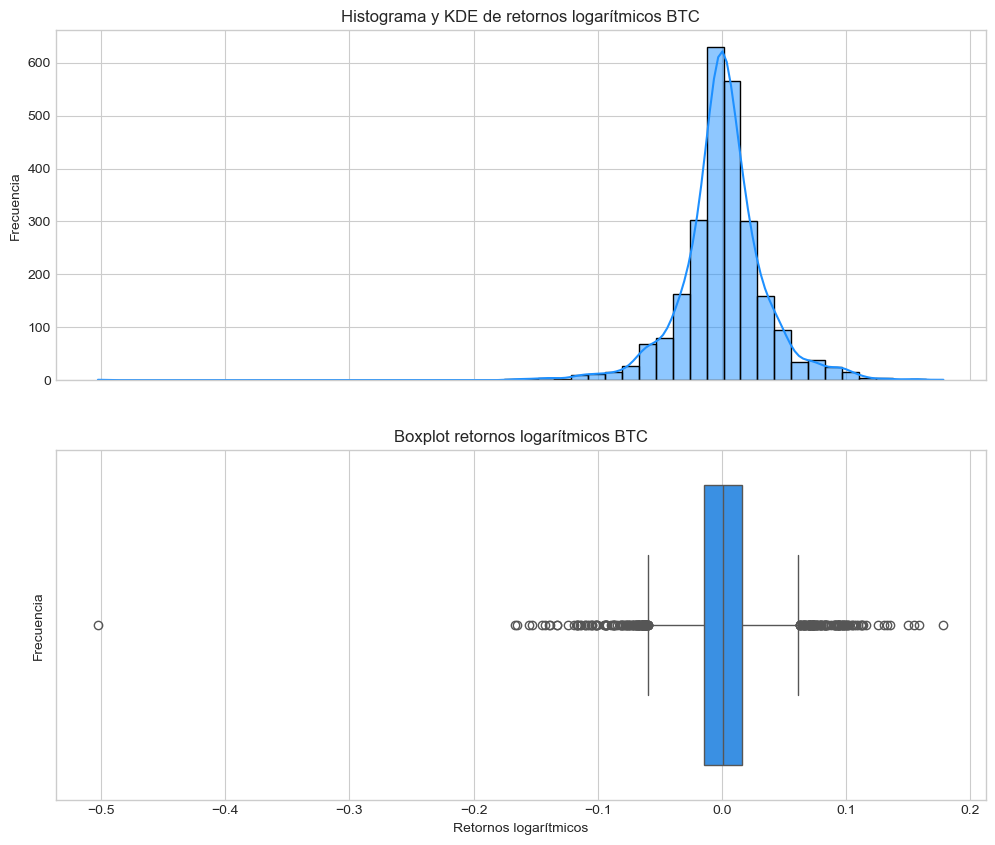

In [9]:
# --- 4. Histogram + KDE ---

fig, axes = plt.subplots(2,1, figsize = (12,10), sharex = True)

sns.histplot(btc['log_return'], kde=True, ax=axes[0], color='dodgerblue', bins=50)
axes[0].set_title("Histograma y KDE de retornos logar√≠tmicos BTC")
axes[0].set_xlabel("Retornos logar√≠tmicos")
axes[0].set_ylabel("Frecuencia")

sns.boxplot(x=btc['log_return'], color='dodgerblue', ax=axes[1])
axes[1].set_title("Boxplot retornos logar√≠tmicos BTC")
axes[1].set_xlabel("Retornos logar√≠tmicos")
axes[1].set_ylabel("Frecuencia")

plt.show()

Los retornos logar√≠tmicos diarios de Bitcoin muestran una distribuci√≥n centrada en cero, con una media de 0.000769 y una mediana de 0.000708, lo que indica que en la mayor√≠a de los d√≠as el cambio porcentual fue peque√±o y positivo. Sin embargo, la desviaci√≥n est√°ndar de 0.0362 revela una alta volatilidad diaria. 

El gr√°fico de retornos logar√≠tmicos diarios muestra la volatilidad: la mayor√≠a de los retornos se agrupan cerca del eje horizontal, pero hay varios picos y ca√≠das abruptas que sobresalen del patr√≥n general. El evento m√°s notable ocurre alrededor de 2020, donde se observa una ca√≠da pronunciada que coincide con el m√≠nimo estad√≠stico de -0.5026.


* Prueba de normalidad

In [10]:
# 3. Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(returns)

# 4. Jarque-Bera
jb_stat, jb_p = jarque_bera(returns)

print("Prueba de normalidad sobre retornos logar√≠tmicos (limpios)")
print(f"Shapiro-Wilk: estad√≠stico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4e}")
print(f"Jarque-Bera: estad√≠stico = {jb_stat:.4f}, p-valor = {jb_p:.4e}")



Prueba de normalidad sobre retornos logar√≠tmicos (limpios)
Shapiro-Wilk: estad√≠stico = 0.9061, p-valor = 3.9137e-37
Jarque-Bera: estad√≠stico = 34303.4305, p-valor = 0.0000e+00


Evaluamos la normalidad de la distribuci√≥n de retornos logar√≠tmicos. Utilizamos Shapiro-Wilk test y Jarque-Bera test. De acuerdo con los resultados estad√≠sticos de Jarque-Bera test, el estad√≠stico es un valor muy grande, un p-valor muy cercano a 0, lo que lleva a rechazar la hip√≥tesis de normalidad. 

In [11]:
# Calcular asimetr√≠a y curtosis
skewness = skew(returns)
kurt = kurtosis(returns, fisher=False)  # fisher=False -> curtosis "normal" (3 en normalidad)

print(f"Asimetr√≠a (Skewness): {skewness:.4f}")
print(f"Curtosis: {kurt:.4f}")

Asimetr√≠a (Skewness): -1.1404
Curtosis: 20.7663


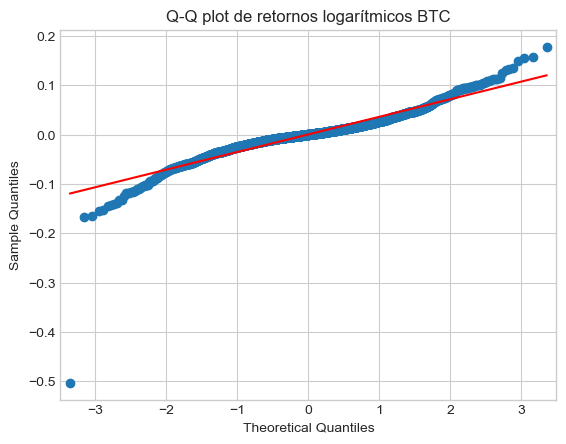

In [12]:
# --- 5. Q-Q Plot ---
sm.qqplot(btc['log_return'], line='s')
plt.title("Q-Q plot de retornos logar√≠tmicos BTC")
plt.show()

** Falta interpretaci√≥n

* Estacionariedad

In [13]:
adf_returns = adfuller(returns)
print("Prueba ADF en retornos:")
print(f"Estad√≠stico ADF: {adf_returns[0]:.4f}")
print(f"p-valor: {adf_returns[1]:.4f}\n")

Prueba ADF en retornos:
Estad√≠stico ADF: -24.0255
p-valor: 0.0000



### Funci√≥n de autocorrelaci√≥n (ACF) de retornos

Autocorrelaci√≥n y heterocedasticidad

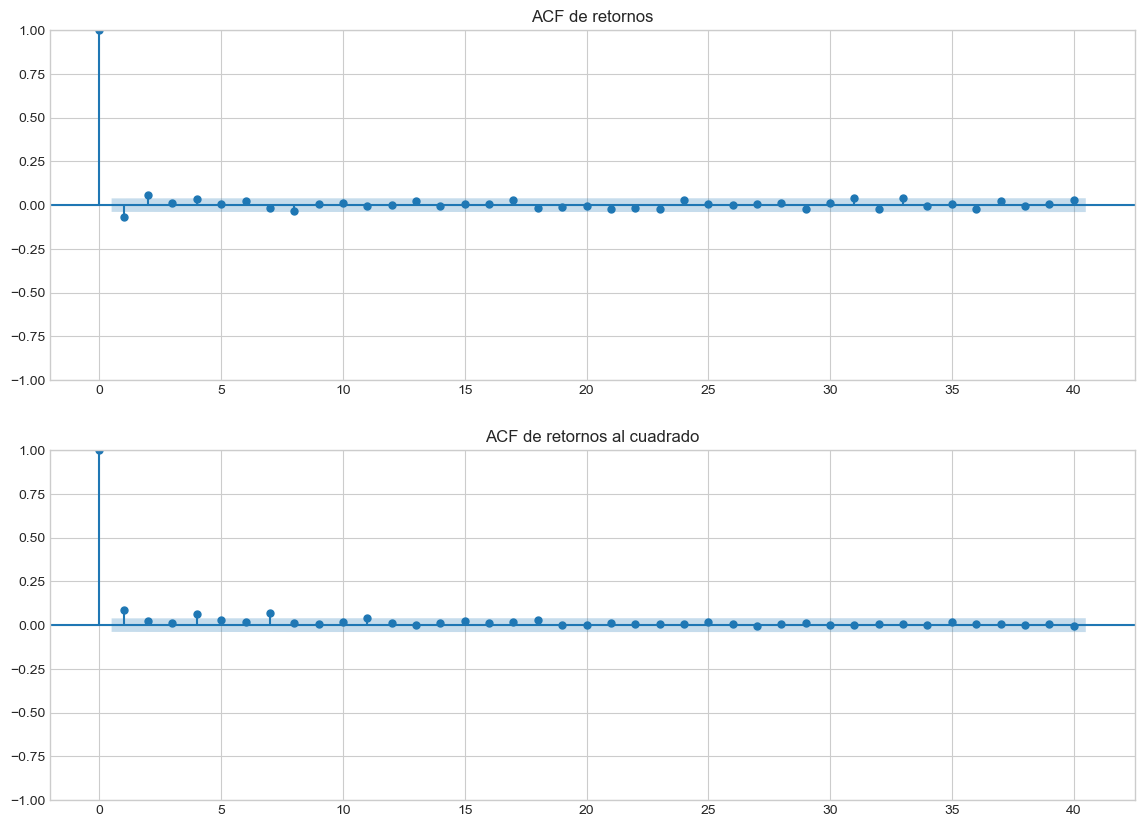

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(14,10))
plot_acf(returns, lags=40, ax=axes[0])
axes[0].set_title("ACF de retornos")

plot_acf(returns**2, lags=40, ax=axes[1])
axes[1].set_title("ACF de retornos al cuadrado")
plt.show()


* Interpretaci√≥n

## 4. Volatilidad historica

#### Descripci√≥n

In [15]:
btc.columns

Index(['Date', 'Close', 'log_return', 'Volatil_D7', 'Volatil_D14',
       'Volatil_D21', 'Volatil_D28'],
      dtype='object')

In [16]:
tabla_vol = {}
ventanas = [7,14,21,28]

for dia in ventanas:
    col = f"Volatil_D{dia}"
    tabla_vol[f"{dia} d√≠as"] = btc[col].describe()

df_vol = pd.DataFrame(tabla_vol).T
df_vol = df_vol[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]  # Orden l√≥gico
df_vol = df_vol.map(lambda x: f"{x:.4f}")

df_vol


count    mean     std     min     25%     50%     75%     max
7 d√≠as   2566.0000  0.5856  0.3462  0.0584  0.3633  0.5222  0.7380  4.0397
14 d√≠as  2566.0000  0.6094  0.3057  0.1031  0.4127  0.5663  0.7254  3.0092
21 d√≠as  2566.0000  0.6209  0.2863  0.1252  0.4362  0.5775  0.7367  2.4849
28 d√≠as  2566.0000  0.6291  0.2728  0.1644  0.4576  0.5785  0.7365  2.1737

#### Distribuci√≥n

C:\Users\Hp\AppData\Local\Temp\ipykernel_33836\3960112699.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ventana', y='Volatilidad', data=df_volatilidad_largo, palette='Blues')


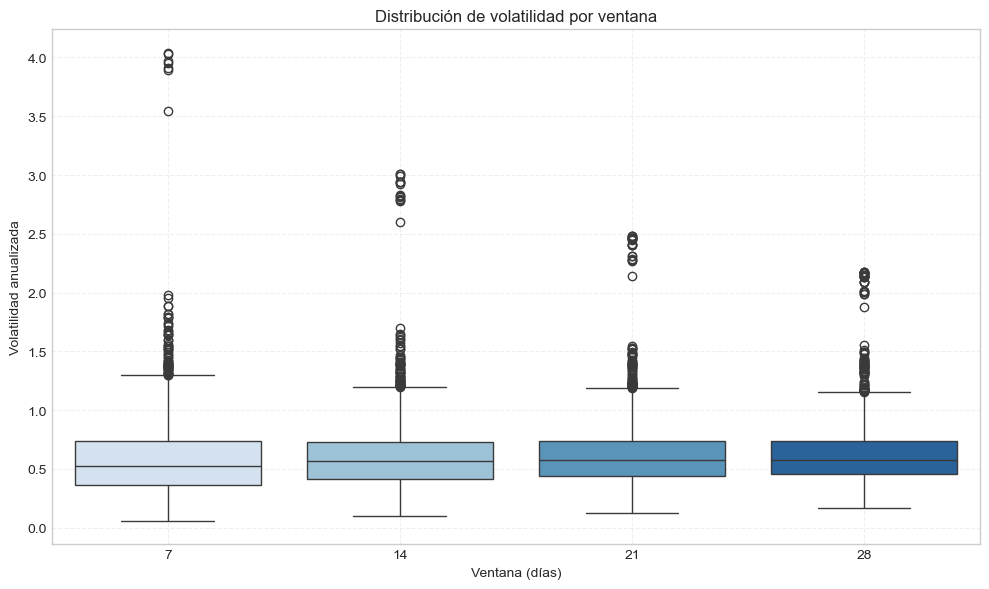

In [17]:
vol_cols = [f"Volatil_D{v}" for v in ventanas]

df_volatilidad_largo = pd.melt(
    btc[vol_cols],
    var_name='Ventana',
    value_name='Volatilidad'
)

# 2. Limpiar etiquetas si deseas que se vean como "7", "14", etc.
df_volatilidad_largo['Ventana'] = df_volatilidad_largo['Ventana'].str.extract(r'(\d+)').astype(int)

# 3. Graficar los boxplots en un solo gr√°fico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ventana', y='Volatilidad', data=df_volatilidad_largo, palette='Blues')

plt.title('Distribuci√≥n de volatilidad por ventana')
plt.xlabel('Ventana (d√≠as)')
plt.ylabel('Volatilidad anualizada')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

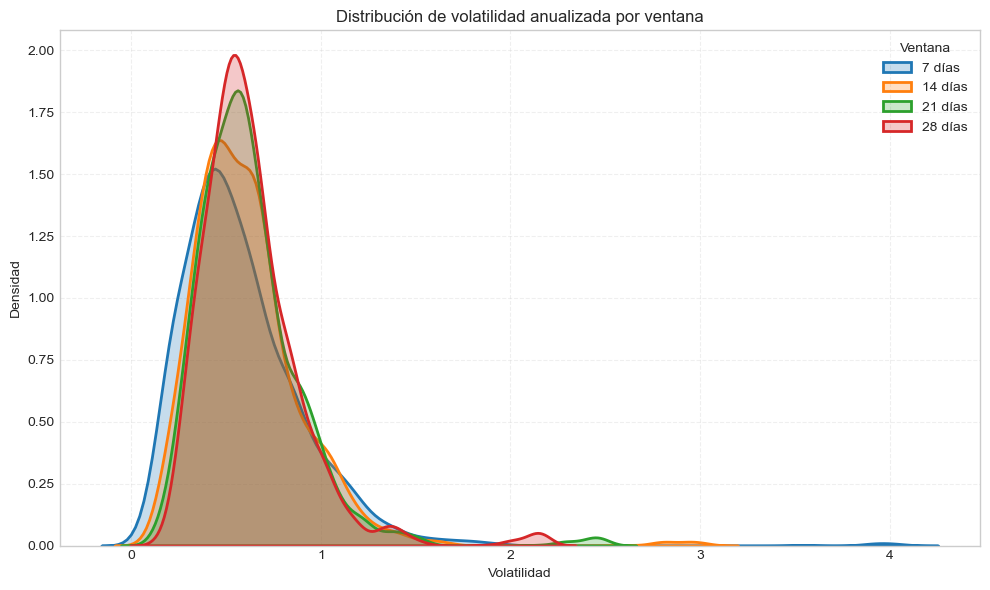

In [18]:
plt.figure(figsize=(10, 6))

for v in ventanas:
    col = f"Volatil_D{v}"
    sns.kdeplot(btc[col].dropna(), label=f'{v} d√≠as', linewidth=2, fill=True)

plt.title('Distribuci√≥n de volatilidad anualizada por ventana')
plt.xlabel('Volatilidad')
plt.ylabel('Densidad')
plt.legend(title='Ventana')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### An√°lisis de normalidad

In [19]:
resultados = []

for v in ventanas:
    col = f"Volatil_D{v}"
    serie = btc[col].dropna()

    # Pruebas de normalidad
    shapiro_stat, shapiro_p = shapiro(serie)
    jb_stat, jb_p = jarque_bera(serie)

    resultados.append({
        'Ventana': f'{v}d',
        'Shapiro-Wilk (stat)': round(shapiro_stat, 4),
        'Shapiro-Wilk (p)': f"{shapiro_p:.4e}",
        'Jarque-Bera (stat)': round(jb_stat, 4),
        'Jarque-Bera (p)': f"{jb_p:.4e}"
    })

# Convertir a tabla
df_normalidad = pd.DataFrame(resultados).set_index('Ventana')
df_normalidad

Shapiro-Wilk (stat) Shapiro-Wilk (p)  Jarque-Bera (stat)  \
Ventana                                                             
7d                    0.8175       3.3458e-47          59722.7860   
14d                   0.8301       4.7016e-46          28403.7315   
21d                   0.8423       7.0816e-45          15006.0162   
28d                   0.8484       2.8766e-44           9325.4569   

        Jarque-Bera (p)  
Ventana                  
7d           0.0000e+00  
14d          0.0000e+00  
21d          0.0000e+00  
28d          0.0000e+00

In [20]:
resultados = []
for v in ventanas:
    col = f"Volatil_D{v}"
    serie = btc[col].dropna()

    resultados.append({
        'Ventana': f'{v}d',
        'Asimetr√≠a': round(skew(serie), 4),
        'Curtosis': round(kurtosis(serie, fisher=False), 4)  # fisher=False ‚Üí compara con normal (valor esperado = 3)
    })

df_asim_kurt = pd.DataFrame(resultados).set_index('Ventana')
df_asim_kurt


Asimetr√≠a  Curtosis
Ventana                     
7d          3.0494   25.8341
14d         2.6499   18.4134
21d         2.3340   13.8887
28d         2.1402   11.3006

üìå ¬øQu√© significan?
- Asimetr√≠a (skewness):
Mide la simetr√≠a de la distribuci√≥n.
- Valor ‚âà 0 ‚Üí distribuci√≥n sim√©trica.
- Valor > 0 ‚Üí sesgo a la derecha (colas largas positivas).
- Valor < 0 ‚Üí sesgo a la izquierda (colas largas negativas).
- Curtosis (kurtosis):
Mide la concentraci√≥n de masa en los extremos.
- Valor ‚âà 3 ‚Üí distribuci√≥n normal.
- Valor > 3 ‚Üí leptoc√∫rtica (colas pesadas, m√°s extremos).
- Valor < 3 ‚Üí platic√∫rtica (menos extremos que la normal).


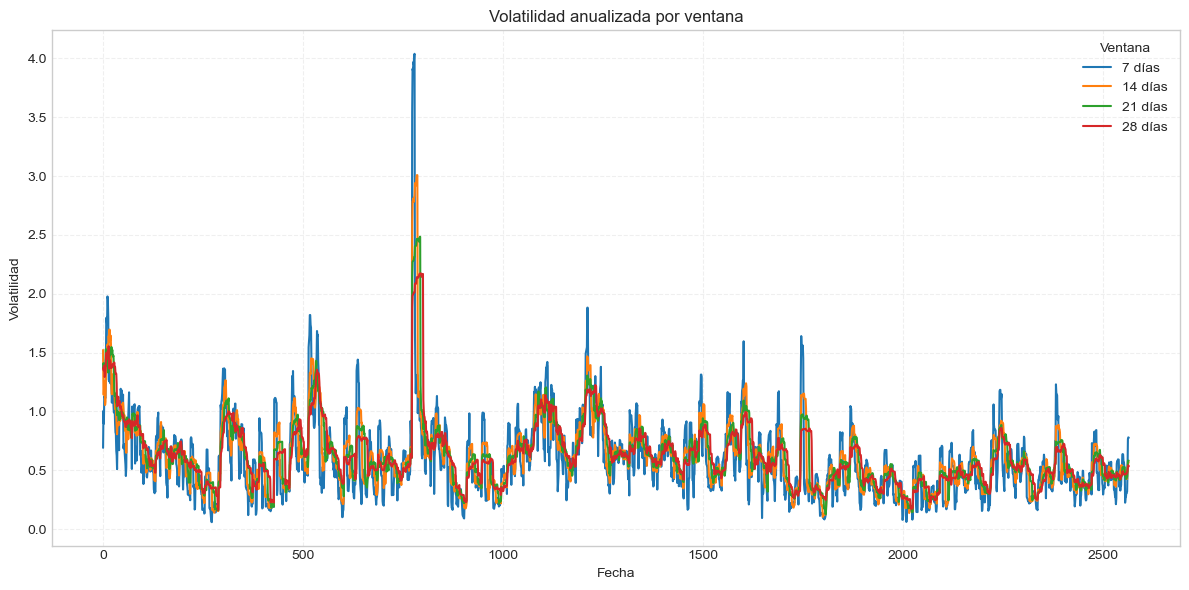

In [21]:
plt.figure(figsize=(12, 6))

for v in ventanas:
    plt.plot(btc.index, btc[f"Volatil_D{v}"], label=f'{v} d√≠as', linewidth=1.5)

plt.title('Volatilidad anualizada por ventana')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend(title='Ventana')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

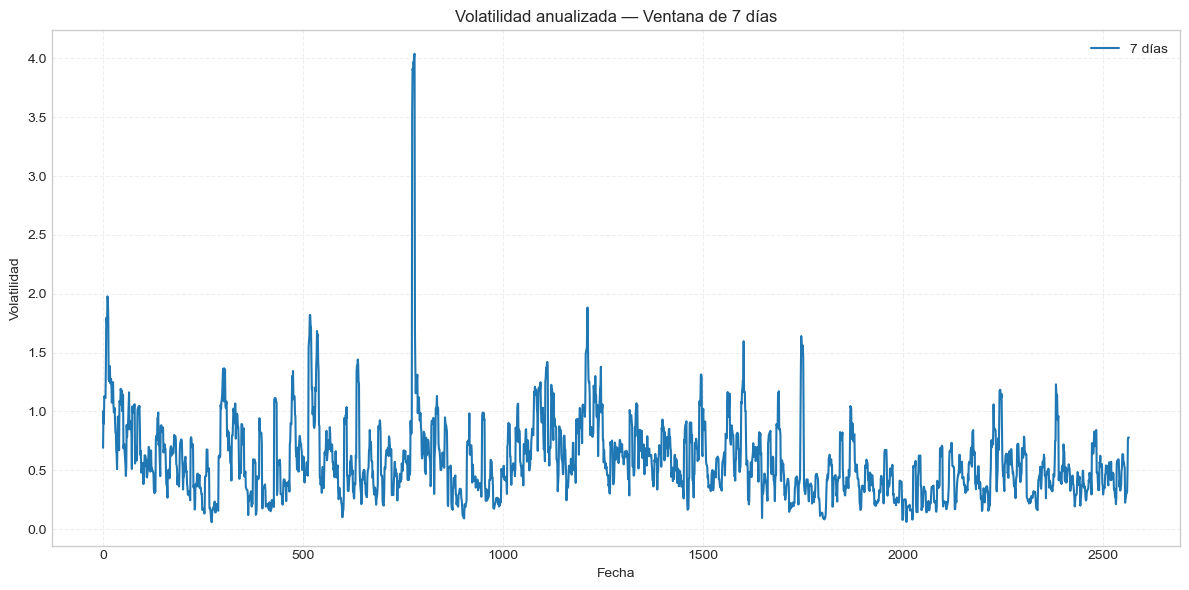

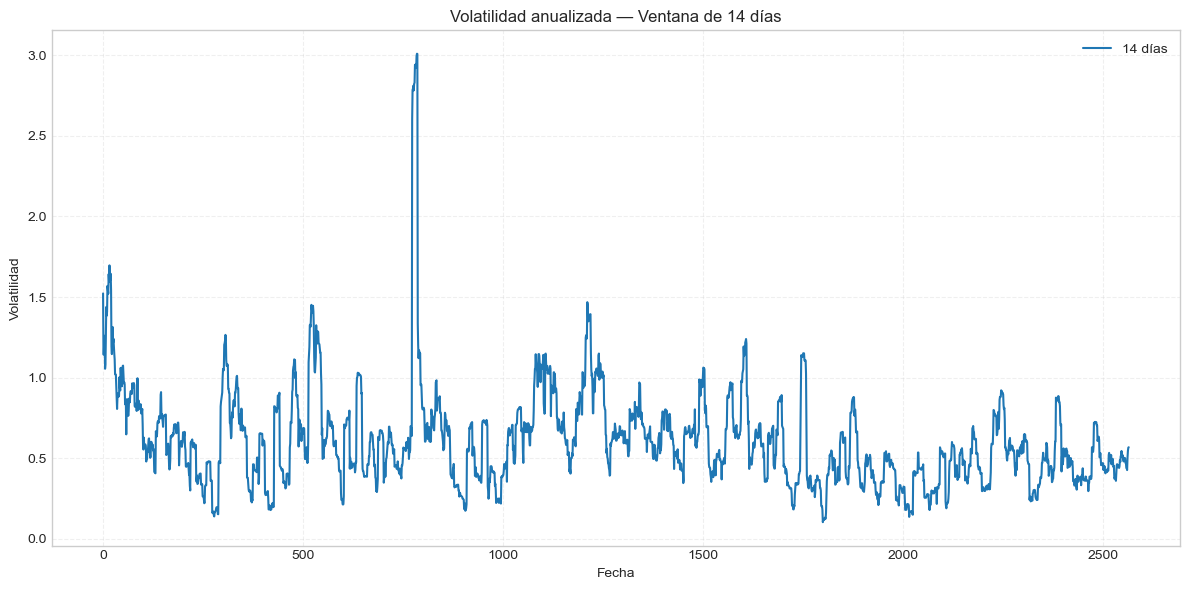

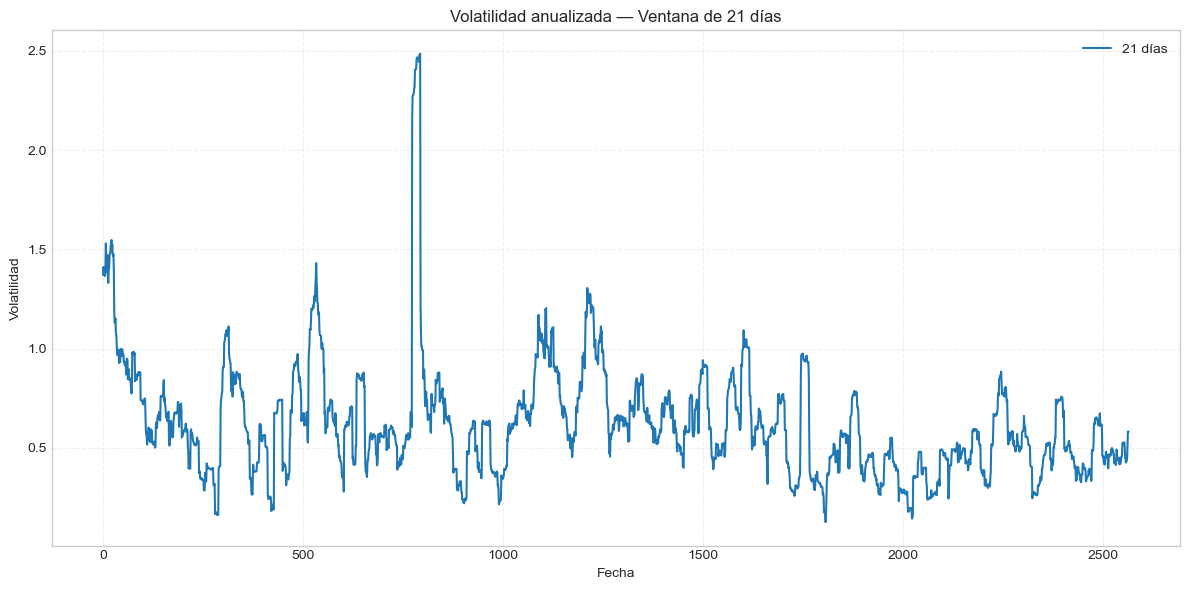

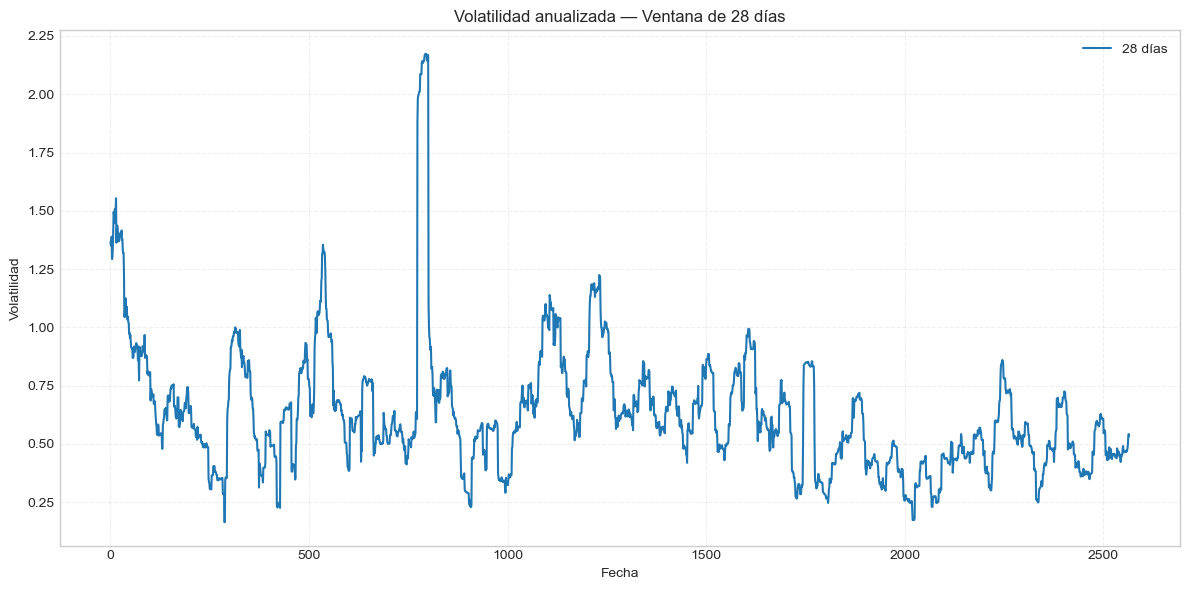

In [23]:
for v in ventanas:
    plt.figure(figsize=(12, 6))
    plt.plot(btc.index, btc[f"Volatil_D{v}"], label=f'{v} d√≠as', linewidth=1.5)
    
    plt.title(f'Volatilidad anualizada ‚Äî Ventana de {v} d√≠as')
    plt.xlabel('Fecha')
    plt.ylabel('Volatilidad')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

#### Analisis de dependencia temporal por ventana

* ACF y PACF

üîç Interpretaci√≥n del ACF (Autocorrelation Function)
- Decaimiento lento y significativo en varios rezagos ‚Üí indica persistencia: la volatilidad de hoy est√° correlacionada con la de d√≠as anteriores.
- Esto sugiere agrupamiento de volatilidad (volatility clustering), t√≠pico en activos financieros.
- No es ruido blanco: hay estructura temporal que puede ser modelada.
üìå Implicaci√≥n t√©cnica: puedes justificar modelos como GARCH, que capturan esta dependencia condicional.

üîç Interpretaci√≥n del PACF (Partial Autocorrelation Function)
- Pico fuerte en lag 1, posiblemente en lag 2 ‚Üí indica que la volatilidad depende directamente de 1 o 2 rezagos.
- Los dem√°s lags caen dentro del intervalo de confianza ‚Üí no aportan correlaci√≥n directa adicional.
üìå Implicaci√≥n t√©cnica: podr√≠as modelar la serie con un componente AR(1) o AR(2) si decides usar modelos ARIMA sobre la volatilidad (aunque GARCH es m√°s apropiado para modelar varianza condicional).



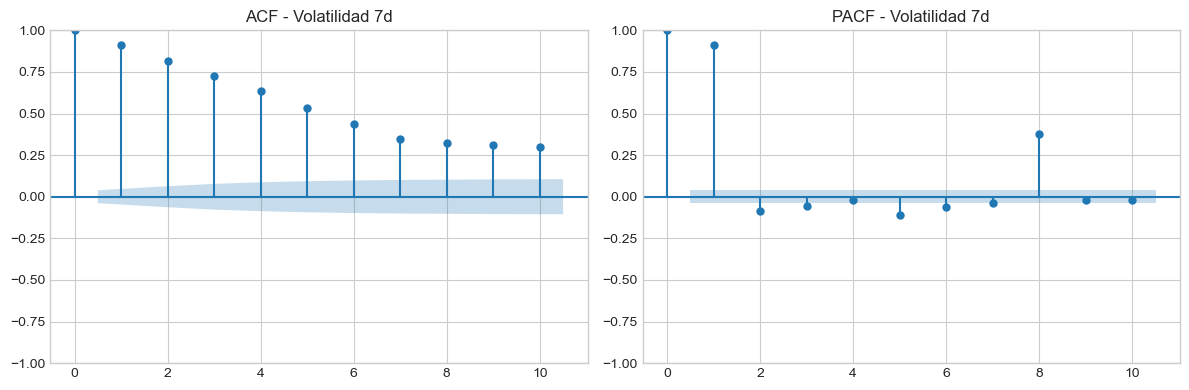

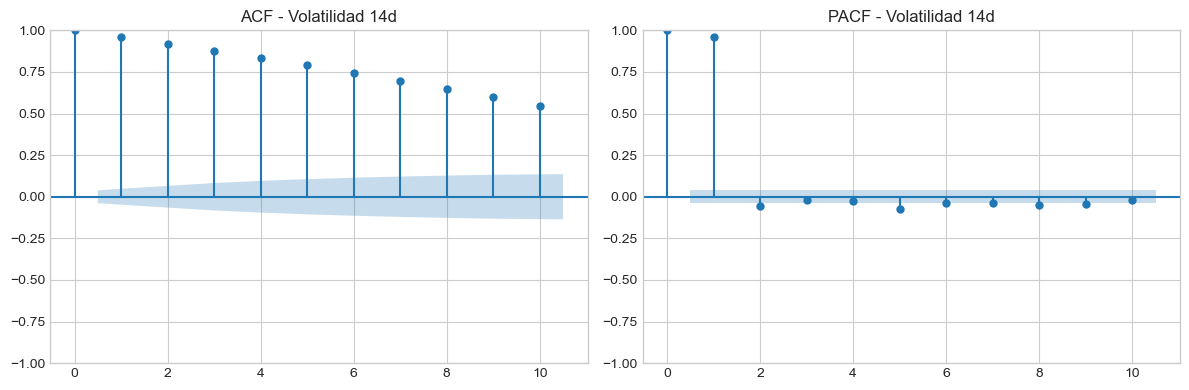

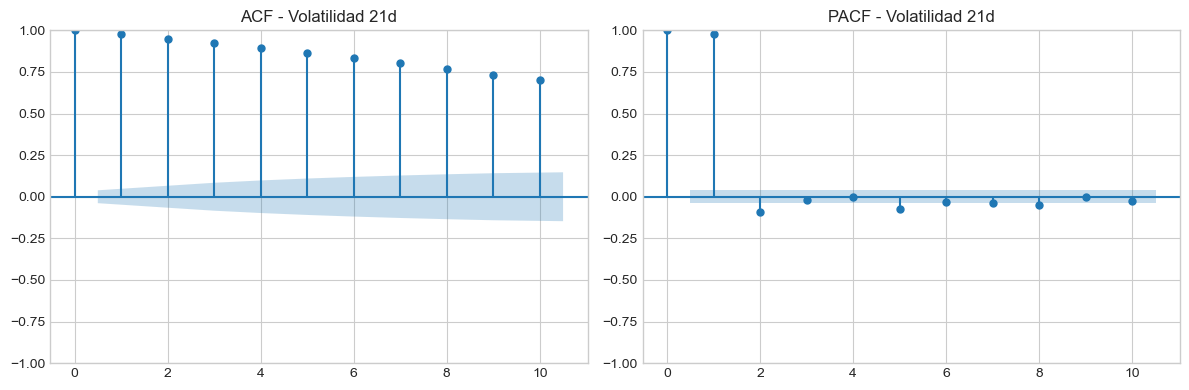

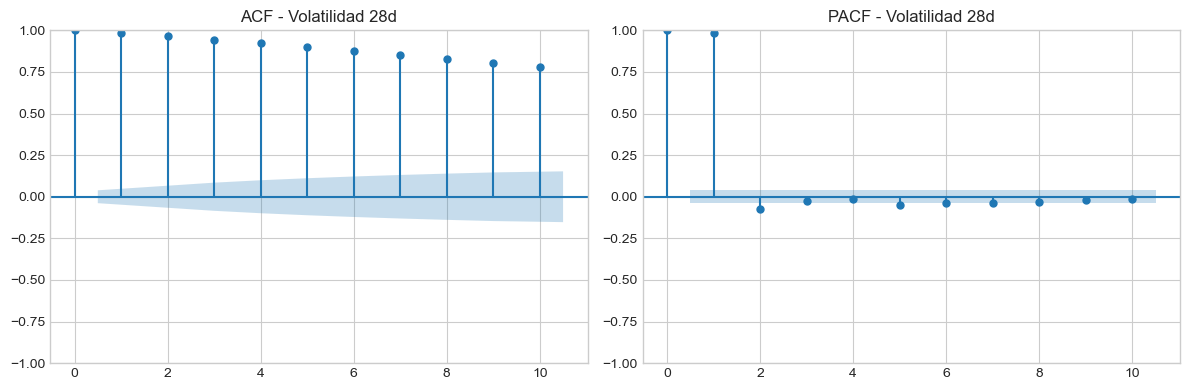

üìä Resultados de dependencia temporal por ventana:


Ljung-Box stat Ljung-Box p  Asimetr√≠a  Curtosis
Ventana                                                 
7d            8520.5384  0.0000e+00     3.0494   25.8341
14d          15375.8857  0.0000e+00     2.6499   18.4134
21d          18529.9222  0.0000e+00     2.3340   13.8887
28d          20294.3076  0.0000e+00     2.1402   11.3006

In [22]:
def analizar_dependencia_volatilidad(btc, ventanas, lags=10):
    resultados = []

    for v in ventanas:
        col = f"Volatil_D{v}"
        serie = btc[col].dropna()

        # Ljung-Box
        lb = acorr_ljungbox(serie, lags=[lags], return_df=True)
        lb_stat = lb['lb_stat'].values[0]
        lb_p = lb['lb_pvalue'].values[0]

        # Asimetr√≠a y curtosis
        skewness = skew(serie)
        kurt = kurtosis(serie, fisher=False)

        resultados.append({
            'Ventana': f'{v}d',
            'Ljung-Box stat': round(lb_stat, 4),
            'Ljung-Box p': f"{lb_p:.4e}",
            'Asimetr√≠a': round(skewness, 4),
            'Curtosis': round(kurt, 4)
        })

        # ACF y PACF
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        plot_acf(serie, ax=axes[0], lags=lags, title=f'ACF - Volatilidad {v}d')
        plot_pacf(serie, ax=axes[1], lags=lags, title=f'PACF - Volatilidad {v}d')
        plt.tight_layout()
        plt.show()

    # Tabla comparativa
    df_resultados = pd.DataFrame(resultados).set_index('Ventana')
    print("üìä Resultados de dependencia temporal por ventana:")

    return df_resultados
analizar_dependencia_volatilidad(btc, ventanas)